In [1]:
%matplotlib nbagg

# PSO(Particle Swarm Optimization)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import deepcopy

## 目的関数

In [3]:
def sphere_func(x: list):
    return sum([val ** 2 for val in x])

def rastrign_func(x: list):
    return sum([val ** 2 - 10 * np.cos(2 * np.pi * val) + 10 for val in x])

## PSO method

In [4]:
def pso(func, M: int=30, D: int=5, c: float=1.494, w: float=0.729,
        tmax: int=1000, cr: float=1e-5, xmin: int=-5, xmax: int=5):
    """
    param <int> M : 粒子数
    param <int> D : 解の次元数
    param <float> c : PSOのパラメータ
    param <float> w : PSOのパラメータ
    param <int> Tmax : 最大試行回数
    param <float> Cr : 終了条件
    param <int> Xmin : 初期値の最小値
    param <int> Xmax : 初期値の最大値
    return <int> : 実行ステップ数
    return <float> : 方程式の値
    return <np.array> : 解のリスト
    粒子群最適化を行うメソッド
    """
    
    # 初期化処理
    # 位置
    x = (xmin - xmax) * np.random.rand(M, D) + xmax
    # 速度
    v = np.zeros((M, D))
    # 解の評価値関数
    f = np.zeros(M)
    # pbest
    fp = np.full(M, np.inf)
    xp = np.zeros((M, D))
    # gbest
    fg = float("inf")
    xg = np.zeros(D)
    # 目的関数の値
    fpbest = float("inf")
    fgbest = float("inf")
    
    fs = []
    xs = []
    
    # 実行
    for t in range(tmax):
        fs.append(fg)
        xs.append(deepcopy(x))
        for i in range(M):
            f[i] = func(x[i])
            # pbest update
            if f[i] < fp[i]:
                fp[i] = f[i]
                for d in range(D):
                    xp[i][d] = x[i][d]
                # gbest update
                if fp[i] < fg:
                    xg = xp[i]
                    fg = func(xg)
        if fg < cr:
            break
        # pso update
        for i in range(M):
            for d in range(D):
                r1 = np.random.rand()
                r2 = np.random.rand()
                v[i][d] = w * v[i][d] + c * (r1 * (xp[i][d] - x[i][d]) +  r2 * (xg[d] - x[i][d]))
                x[i][d] = x[i][d] + v[i][d]


    return (t+1, fg, xg, fs, xs)

<IPython.core.display.Javascript object>


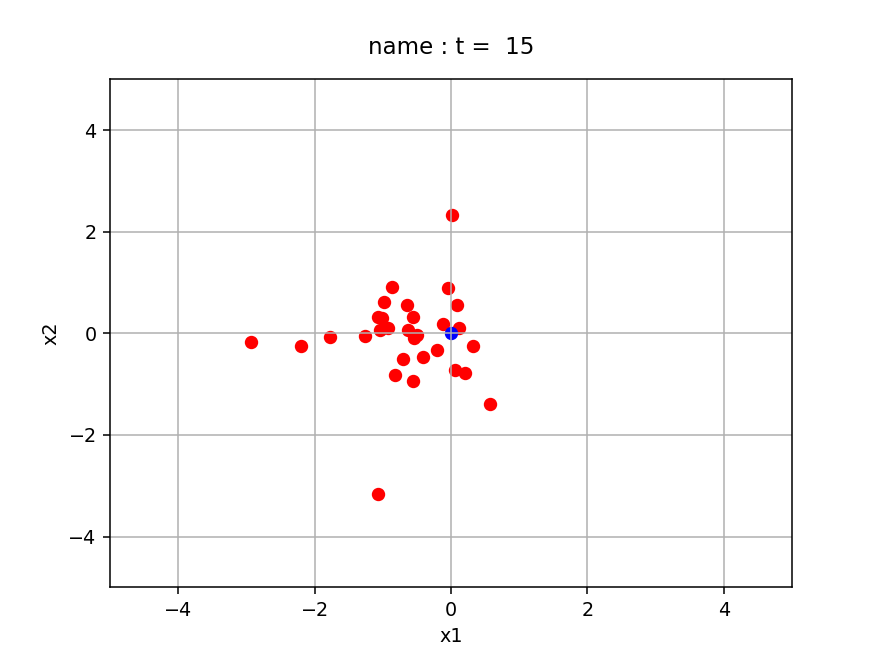

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t, f, x, fs, xs = pso(sphere_func)
imgs = []
for i, dots in enumerate(xs):
    dots_x = [dot[0] for dot in dots]
    dots_y = [dot[1] for dot in dots]
    img = ax.scatter(dots_x, dots_y, c="red")
    title = ax.text(0.5, 1.05, "name : t =  {}".format(str(i + 1)), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes, )
    imgs.append([img, title])
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.scatter(x[0], x[1], c="blue")
ani = animation.ArtistAnimation(fig, imgs, interval=100)
ani.save("a.gif", writer="imagemagick")

<IPython.core.display.Javascript object>


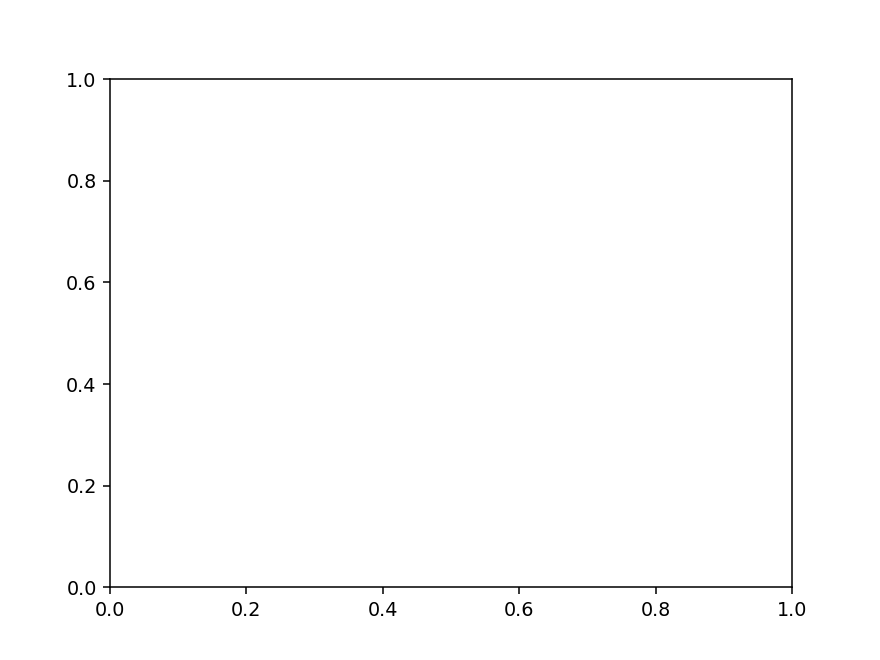

ValueError: x and y must have same first dimension, but have shapes (79,) and (80,)

In [6]:
fig = plt.figure()
ts = np.array([i + 1 for i in range(t - 1)])
plt.plot(ts, np.array(fs))

In [ ]:
def graph_plot(graph_vals):
    plt.plot(range(1, len(graph_vals)+1), graph_vals)
    plt.xlabel("calc val")
    plt.ylabel("func val") 

In [ ]:
def dot_plot(dot_vals):
    imgs = [plt.scatter(dot_val, dot_val)
            for dot_val in dot_vals] 
    fig = plt.figure()
    ani = animation.ArtistAnimation(fig, imgs, interval=100)
    ani.save('anim.gif', writer='imagemagick', fps=40)
    plt.show()

In [ ]:
pso(rastrign_func)